Scipy:

We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.

Task:

1.fitting it to the periodic function

2.plot the fit

Data

Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25

Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

Text(0, 0.5, 'Min and Max temperature')

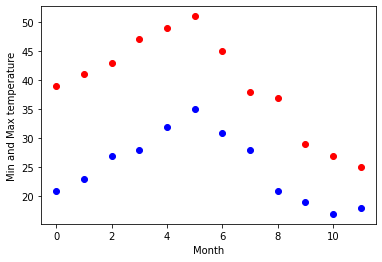

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#initializing data
Max = [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]
Min = [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]
temp_max = np.array(Max)
temp_min = np.array(Min)
months = np.arange(12)
#ploting data
plt.plot(months, temp_max, 'ro')
plt.plot(months, temp_min, 'bo')
plt.xlabel('Month')
plt.ylabel('Min and Max temperature')

In [25]:
# 1. fitting it to the periodic function

from scipy import optimize

def yearly_temperatures(times, avg, ampl, time_offset):
  ''' This(yearly_tempratures) function returns the values that plot the curve for the data.'''
  return (avg + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

#getting the curve values for plot using scipy
res_max, cov_max = optimize.curve_fit(yearly_temperatures, months,temp_max, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temperatures, months,temp_min, [40, 20, 0])
print(res_max)
print(res_min)


[ 39.10062829 -11.0872493    2.10332481]
[24.87112259 -7.89899664  1.60673368]


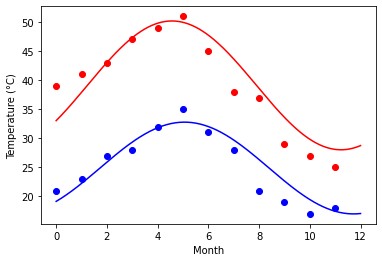

In [29]:
#2. plot the fit
days = np.linspace(0, 12, num=365)
plt.figure()
plt.plot(months,Max, 'ro')
# plt.plot(days, yearly_temperatures(days, avg = res_max[0], ampl=res_max[1],time_offset=res_max[2]), 'r-')
plt.plot(days, yearly_temperatures(days, *res_min), 'r-') #Used Arbitrary Arguments, *args
plt.plot(months,Min, 'bo')
plt.plot(days, yearly_temperatures(days, *res_min), 'b-')#Used Arbitrary Arguments, *args
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.show()


Matplotlib:
This assignment is for visualization using matplotlib:
data to use:

url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv

titanic = pd.read_csv(url)
Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')
data.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [34]:
data['sex'].value_counts()/len(data) * 100

male      64.351145
female    35.572519
Name: sex, dtype: float64

In [38]:
titanic_male_female_data = round(data['sex'].value_counts()/len(data) * 100, 3)
titanic_male_female_data

male      64.351
female    35.573
Name: sex, dtype: float64

In [39]:
titanic_male_female_data_df = pd.DataFrame(titanic_male_female_data)
titanic_male_female_data_df

,sex
male,64.351
female,35.573


1. Create a pie chart presenting the Male/Female Proportion

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """Entry point for launching an IPython kernel.


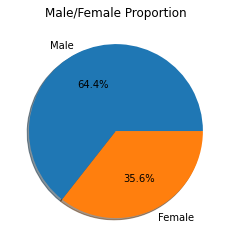

In [49]:
plt.pie(titanic_male_female_data_df, labels=['Male', 'Female'], autopct='%1.1f%%', shadow= True, )
plt.title('Male/Female Proportion')
plt.show()

2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender


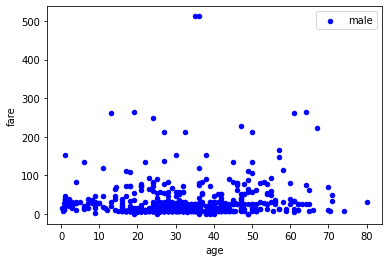

In [58]:
titanic_male_scatter_data = data[data['sex']=='male'].plot.scatter('age', 'fare', color='blue',label='male') #Male scatter plot

<Figure size 432x288 with 0 Axes>

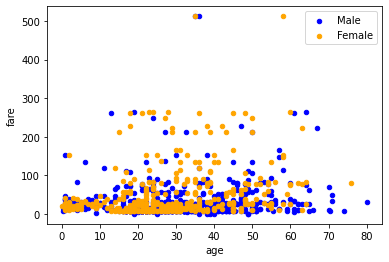

In [63]:
plt.figure()
titanic_male_scatter_data = data[data['sex']=='male'].plot.scatter('age', 'fare', color='blue',label='Male')
titanic_female_scatter_data = data[data['sex']=='female'].plot.scatter('age', 'fare',color='orange',label='Female',ax=titanic_male_scatter_data)